# Perceptron 

In [7]:
#AND gate
import numpy as np
def AND(x1, x2):
    x = np.array([x1, x2]) #입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.5 # bias(편향)
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1 

In [8]:
#OR gate
import numpy as np
def OR(x1, x2):
    x = np.array([x1, x2]) #입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.2 # bias(편향)
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1 

In [9]:
#NAND gate
import numpy as np
def NAND(x1, x2):
    x = np.array([x1, x2]) #입력
    w = np.array([-0.5, -0.5]) # 가중치
    b = 0.7 # bias(편향)
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1 

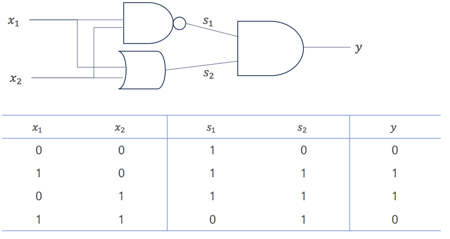

In [10]:
#XOR gate
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [11]:
XOR(0,0)

0

In [12]:
XOR(1,0)

1

In [13]:
XOR(0,1)

1

In [14]:
XOR(1,1)

0

# Neural Network

### Activation Function
### 1. Step Function

In [15]:
import numpy as np
import matplotlib.pylab as plt

In [16]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print("x = ", x)
print("y = ", y)

x =  [-1.  1.  2.]
y =  [False  True  True]


In [17]:
y = y.astype(np.int)
print("y = ", y)

y =  [0 1 1]


In [18]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

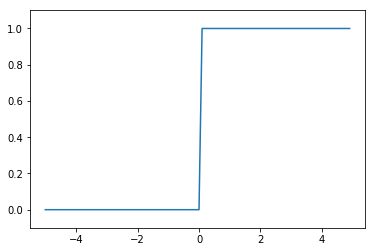

In [19]:
X = np.arange(-5.0, 5.0, 0.1) #-5.0에서 5.0전 까지 0.1 간격의 배열 생성 
Y = step_function(X)
#plt.figure(figsize = (15, 10)) # 그래프 사이즈 확대하고 싶을때 
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.show()

### 2. Sigmoid Fucntion

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

In [21]:
x = np.array([-1, 1.0, 2.0])
y = sigmoid(x)
print("y =", y)

y = [0.26894142 0.73105858 0.88079708]


In [22]:
t = np.array([1.0, 2.0, 3.0])
print("t + 1 =", t + 1) #결과 배열 출력
print("1 / t =", 1/t)

t + 1 = [2. 3. 4.]
1 / t = [1.         0.5        0.33333333]


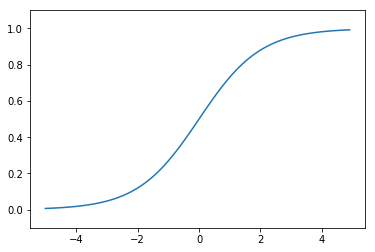

In [23]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)

#plt.figure(figsize = (15, 10)) # 그래프 사이즈 확대하고 싶을때 
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

#### Sigmoid vs. Step Function

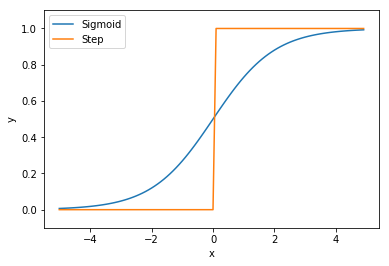

In [24]:
X = np.arange(-5.0, 5.0, 0.1)
Y_sig = sigmoid(X)
Y_step = step_function(X)
Y = np.vstack((Y_sig, Y_step))
labels = ["Sigmoid", "Step"]
#plt.figure(figsize = (15, 10))
for index in range(len(Y)):
    plt.plot(X, Y[index], label=labels[index])
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

### 3. ReLU Function

In [25]:
def relu(x):
    return np.maximum(0, x)

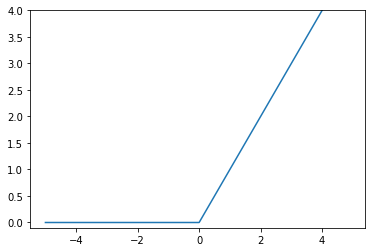

In [26]:
X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)
#plt.figure(figsize = (15, 10))
plt.plot(X, Y)
plt.ylim(-0.1, 4)
plt.show()

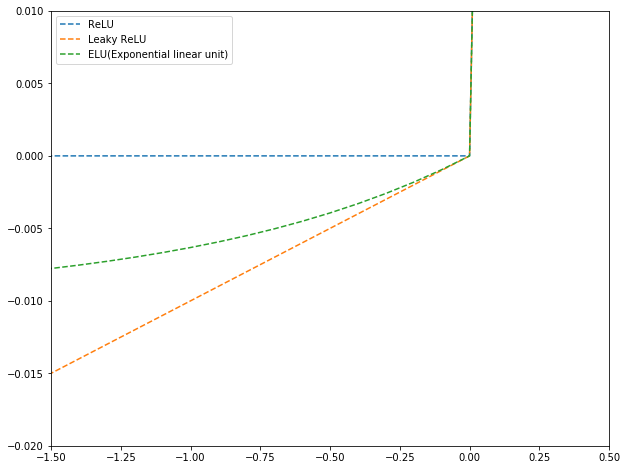

In [27]:
def relu_func(x): # ReLU(Rectified Linear Unit) 함수
    return (x>0)*x
    
x = np.arange(-5.0, 5.0, 0.1)

#그래프 출력
plt.figure(figsize = (10, 8))
plt.plot(x, relu_func(x), linestyle='--', label="ReLU")
 
def leakyrelu_func(x): # Leaky ReLU 함수
    return (x>=0)*x + (x<0)*0.01*x # 알파값(보통 0.01) 조정가능
    
 #그래프 출력
plt.plot(x, leakyrelu_func(x), linestyle='--', label="Leaky ReLU")
 
def elu_func(x): # ELU(Exponential linear unit)
    return (x>=0)*x + (x<0)*0.01*(np.exp(x)-1)
 
#그래프 출력
plt.plot(x, elu_func(x), linestyle='--', label="ELU(Exponential linear unit)")

#그래프 fitting
plt.xlim(-1.5, 0.5)
plt.ylim(-0.020, 0.01)
plt.legend()
plt.show()

## Caculate Multi-dimension Array

### Multi Dimension Array

In [28]:
A = np.array([1, 2, 3, 4])
print("A =", A)
print("A.ndim =",np.ndim(A)) #차원수
print("A.shape =", A.shape) #형상

A = [1 2 3 4]
A.ndim = 1
A.shape = (4,)


In [29]:
B = np.array([[1,2], [3,4], [5,6]])
print("B =", B)
print("B.ndim = ", np.ndim(B))
print("B.shape =", B.shape)

B = [[1 2]
 [3 4]
 [5 6]]
B.ndim =  2
B.shape = (3, 2)


### Inner Product of Matrix

In [30]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("A.shape =", A.shape)
print("B.shape =", B.shape)

A.shape = (2, 2)
B.shape = (2, 2)


In [31]:
result = np.dot(A, B)
print("A·B =",result)
print("result.shape =", result.shape)

A·B = [[19 22]
 [43 50]]
result.shape = (2, 2)


In [32]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
print("A.shape =", A.shape)
print("B.shape =", B.shape)

A.shape = (2, 3)
B.shape = (3, 2)


In [33]:
result = np.dot(A, B)
print("A·B =",result)
print("result.shape =", result.shape)

A·B = [[22 28]
 [49 64]]
result.shape = (2, 2)


In [34]:
C = np.array([[1, 2], [3, 4]])
print("C.shape =", C.shape)
print("A·C =", np.dot(A, C))

C.shape = (2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

matrix의 차원이 다르면 내적 불가능

In [35]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print("A.shape =", A.shape)
B = np.array([7, 8])
print("B.shape =", B.shape)
print("A·B = ", np.dot(A, B))

A.shape = (3, 2)
B.shape = (2,)
A·B =  [23 53 83]


### Inner Product of Neural Network

In [38]:
x = np.array([1, 2])
print("shape of input =", x.shape)
weight = np.array([[1, 3, 5], [2, 4, 6]])
print("weight =", weight)
print("shape of weight =", weight.shape)
y = np.dot(x, weight)
print("y =", y)

shape of input = (2,)
weight = [[1 3 5]
 [2 4 6]]
shape of weight = (2, 3)
y = [ 5 11 17]


## 3 Layers Neural Network

### Tranfer Signal of Each Layers

In [39]:
#X, weight, bias 값은 임의 설정
x = np.array([1.0, 0.5]) # 1X2
weight1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2X3
bias1 = np.array([0.1, 0.2, 0.3]) # 1X3
print("shape of input =", x.shape)
print("shape of weight1 =", weight1.shape)
print("shape of bias1 =", bias1.shape)

shape of input = (2,)
shape of weight1 = (2, 3)
shape of bias1 = (3,)


In [42]:
result_of_inner1 = np.dot(x, weight1) + bias1 # 행렬 연산
print("result of inner1 =", result_of_inner1)
result_of_sigmoid1 = sigmoid(result_of_inner1) # 활성화 함수
print("result of sigmoid1 =", result_of_sigmoid1)

result of inner1 = [0.3 0.7 1.1]
result of sigmoid1 = [0.57444252 0.66818777 0.75026011]


In [43]:
weight2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
bias2 = np.array([0.1, 0.2])
print("shape of sigmoid1 =", result_of_sigmoid1.shape)
print("shape of weight2 =", weight2.shape)
print("shape of bias2 =", bias2.shape)
print(weight2)

shape of sigmoid1 = (3,)
shape of weight2 = (3, 2)
shape of bias2 = (2,)
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]


In [44]:
result_of_inner2 = np.dot(result_of_sigmoid1, weight2) + bias2
result_of_sigmoid2 = sigmoid(result_of_inner2)
print("result of inner1 =", result_of_inner2)
print("result of sigmoid1 =", result_of_sigmoid2)

result of inner1 = [0.51615984 1.21402696]
result of sigmoid1 = [0.62624937 0.7710107 ]


In [45]:
# part of activation function
# 출력층의 활성화 함수로 항등 함수 사용
# 입력을 그대로 출력하도록 하는 함수 
def identity_function(x):
    return x

In [46]:
weight3 = np.array([[0.1, 0.3], [0.2, 0.4]])
bias3 = np.array([0.1, 0.2])
print("shape of sigmoid2 =", result_of_sigmoid2.shape)
print("shape of weight3 =", weight3.shape)
print("shape of bias3 =", bias3.shape)

shape of sigmoid2 = (2,)
shape of weight3 = (2, 2)
shape of bias3 = (2,)


In [47]:
result_of_inner3 = np.dot(result_of_sigmoid2, weight3) + bias3
output = identity_function(result_of_inner3)
print("output =", output)

output = [0.31682708 0.69627909]


### Summary of Tranfering Signal of Each Layers

In [49]:
#가중치와 bias 초기화 후 딕셔너리 변수 network에 저장
def init_network():
    network = {}
    network["weight1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["bias1"] = np.array([0.1, 0.2, 0.3])
    network["weight2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["bias2"] = np.array([0.1, 0.2])
    network["weight3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["bias3"] = np.array([0.1, 0.2])
    
    return network

In [50]:
# 입력 신호를 출력으로 변환
def forward(network, x):
    weight1, weight2, weight3 = network["weight1"], network["weight2"], network["weight3"]
    bias1, bias2, bias3 = network["bias1"], network["bias2"], network["bias3"]
    
    result_of_inner1 = np.dot(x, weight1) + bias1
    output1 = sigmoid(result_of_inner1)
    result_of_inner2 = np.dot(output1, weight2) + bias2
    output2 = sigmoid(result_of_inner2)
    result_of_inner3 = np.dot(output2, weight3) + bias3
    y = identity_function(result_of_inner3)
    
    return y

In [51]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## Design of Output Layers

### Identy Function & Softmax Function

#### Process of Softmax Function

In [52]:
matrix = np.array([0.3, 2.9, 4.0])
exponential_matrix = np.exp(matrix) # 지수함수
print(exponential_matrix)

[ 1.34985881 18.17414537 54.59815003]


In [53]:
sum_of_exponential_matrix = np.sum(exponential_matrix) # 지수함수의 합
print(sum_of_exponential_matrix)

74.1221542101633


In [54]:
y = exponential_matrix / sum_of_exponential_matrix
print(y)

[0.01821127 0.24519181 0.73659691]


#### Softmax Function

In [55]:
def softmax(matrix):
    exponential_matrix = np.exp(matrix)
    sum_of_exponential_matrix = np.sum(exponential_matrix)
    y = exponential_matrix / sum_of_exponential_matrix

### Precautions of Softmax Function

In [56]:
matrix = np.array([1010, 1000, 900])
result_of_softmax = np.exp(matrix) / np.sum(np.exp(matrix)) #softmax 함수 계산
print(result_of_softmax) #nan 으로 계산이 안됨

[nan nan nan]


C:\Users\p\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\p\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


 지수함수에 큰값이 들어가서 overflow가 발생, 제대로 softmax가 계산되지 않는다.

In [57]:
maximum_of_matrix = np.max(matrix)
print(maximum_of_matrix)
difference_from_maximum = matrix - maximum_of_matrix # matrix의 최대 값을 빼주면 올바르게 작동
print(difference_from_maximum)

1010
[   0  -10 -110]


In [58]:
result_of_softmax = np.exp(difference_from_maximum) / np.sum(np.exp(difference_from_maximum))
print(result_of_softmax)

[9.99954602e-01 4.53978687e-05 1.68883521e-48]


#### Softmax Function reversion

In [59]:
def softmax(matrix):
    maximum_of_matrix = np.max(matrix) #오버플로우 방지용, 입력 값의 가장 큰 수 찾기
    difference_from_maximum = matrix - maximum_of_matrix #입력값에 가장 큰 수로 빼주기 
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    
    return y

### feature of softmax function

In [60]:
matrix = np.array([0.3, 2.9, 4.0])
y = softmax(matrix)
print("y =", y)
print("sum of y =", np.sum(y))

y = [0.01821127 0.24519181 0.73659691]
sum of y = 1.0


## Recognition of Handwriting Numbers

### MNIST Dataset

In [61]:
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

In [62]:
# load_mnist() : MNIST 데이터를 (train 이미지, train레이블), (test 이미지, test레이블) 로 반환
# load_mnist()의 3가지 인수
#1. normalize = False: 입력 이미지의 픽셀을 0.0 ~1.0사이의 값으로 정규화 할지 여부, False의 경우 0 ~ 255 값
#2. flatten = True: 입력 이미지를 어떻게 가져올 것인지, True의 경우 1차원 배열, False의 경우 1X28X28의 3차원 배열
#3. One_hot_label: 원-핫 인코딩 형태로 저장 여부
(train_image_data, train_label_data), (test_image_data, test_label_data) = load_mnist(flatten = True, normalize = False)

In [63]:
print(train_image_data.shape)
print(train_label_data.shape)
print(test_image_data.shape)
print(test_label_data.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [64]:
image = train_image_data[0]
image.shape

(784,)

In [65]:
#load_mnist()함수에서 flatten = True로 불러왔으므로 현재 1차원 배열로 저장되어 있음
# 이를 원래 이미지로 복원하여 원래 이미지 확인
image_reshaped = image.reshape(28,28)  
image_reshaped.shape

(28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

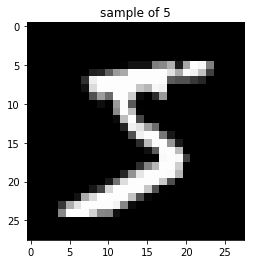

In [66]:
label = train_label_data[0]
plt.figure(figsize = (4, 4))
plt.title("sample of " + str(label))
plt.imshow(image_reshaped, cmap = "gray")
plt.show

### Design Neural Network

In [67]:
def get_data():
    (image_train, label_train), (image_test, label_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return image_test, label_test

#학습된 가중치와, bias가 딕셔너리 변수로 저장되어 있음, 학습은 다음시간에!
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

# Hidden layer 2개 
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [75]:
labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [82]:
images, labels = get_data()
network = init_network()

accuracy_cnt = 0
# x에 저장된 이미지 데이터를 1장씩 꺼내어 Predict()함수를 통해 분류
for i in range(len(images)): #predict() 함수는 각 레이블의 값을 넘파이 배열로 반환
    y = predict(network, images[i]) 
    p = np.argmax(y) # 레이블 값 중 가장 큰 원소의 인덱스 구함 
    if p == labels[i]:
        accuracy_cnt += 1 #예측 답변과 정답 레이블 비교하여 맞은 숫자 카운트

    #맞은 숫자를 전체 이미지 숫자로 나누어 정확도 구함 
print("Accuracy:" + str(float(accuracy_cnt) / len(images))) 

Accuracy:0.9352


### Neural Network with Batch

In [86]:
images, labels = get_data()
network = init_network()

In [87]:
print("shape of images =", images.shape)
print("shape of weight1 =", network["W1"].shape)
print("shape of weight2 =", network["W2"].shape)
print("shape of weight3 =", network["W3"].shape)

shape of images = (10000, 784)
shape of weight1 = (784, 50)
shape of weight2 = (50, 100)
shape of weight3 = (100, 10)


In [88]:
batch_size = 100 #배치 크기
accuracy_cnt = 0

#0부터 len(image)-1까지 배치 사이즈(100) 간격으로 증가하는 리스트 반환
for i in range(0, len(images), batch_size): 
#입력 데이터의 i 번째부터 i+batch_n 까지의 데이터를 묶는다.
#현재 배치 사이즈가 100 이므로 images[0:100], images[100:200]식으로 앞에서 부터 100장씩 묶어 꺼냄   
    x_batch = images[i:i+batch_size] 
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 최댓값의 인덱스틑 찾도록 함 
    accuracy_cnt += np.sum(p == labels[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(images)))

Accuracy:0.9352


In [89]:
print(list(range(0, 10))) #0에서 9까지 리스트 반환
print(list(range(0, 10, 3))) #0에서 9까지 리스트 중 3step 간격으로 반환

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


In [90]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis = 1)
print(y)

[1 2 1 0]


In [91]:
true = np.array([1, 2, 0, 0])
print(y == true)
print(np.sum(y == true))

[ True  True False  True]
3
